# **CIS7031 - Programming for Data Analysis**

**Predicting the regional basis B corp certification values using the similar industrial datas**


**Dataset :** B Corporations Impact Data
(Social and environmental impact data of Certified B Corporations worldwide)

Link to dataset: https://www.kaggle.com/datasets/thedevastator/b-corporation-impact-data


The dataset has 135 columns which includes company information, industry information, certification details, geographical information, and the scores for impact areas.


**Analytical Questions:**

Which are the impact areas companies have focused that has affected the overall score? How can we use the previous b corp companies’ data to from 2007 up to 2023 to forecast the regions and sectors that will have more environment and societal based companies? Predicting the overall score based on all impact areas, industry category, sector, and regions to give insights to the society.

# 1.0 Importing Libraries

In [3]:
# import basic python library
import pandas as pd

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import Normalize, to_hex

# google support library
from google.colab import drive

# importing libraries for geo locations such as countries nad cities
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# 2.0 Loading the data set

In [4]:
# Mounting the google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Linux command line to access the working directory of Google Drive
%cd "/content/drive/My Drive/CIS7031"

/content/drive/My Drive/CIS7031


In [6]:
# Load the B Corp Impact Data
bcorps_main_data = pd.read_csv("B Corp Impact Data.csv")

# 3.0 Understanding the dataset

In [7]:
# inspecting the first 10 rows of the dataset
bcorps_main_data.head(10)

,index,company_id,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,0,001C000001cjG1nIAE,B1G1,2017-10-11,2021-05-27 04:07:25.168843+00:00,certified,B1G1 runs a business movement that enables bus...,Membership organizations,Other services,A global business-giving movement already crea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,001C000001cjG1nIAE,B1G1,2017-10-11,2017-10-11 00:00:00+00:00,certified,B1G1 runs a business movement that enables bus...,Membership organizations,Other services,A global business-giving movement already crea...,...,NaN,NaN,4.7,NaN,1.8,NaN,NaN,2.7,NaN,2.0
2,2,0013b00001p3n7tAAA,RPM,2021-02-08,2021-02-08 03:35:47.601595+00:00,certified,RPM is an independent creative experience agen...,Advertising & market research,Professional & technical services,Independent Creative Experience Agency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,001C000001fH72gIAC,Kingsfleet,2022-05-18,2022-05-18 14:13:36.866684+00:00,certified,"Chartered Financial Planners, Independent Fina...",Investment advising,Financial & insurance activities,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,001C000001cjg3CIAQ,Impact Hub Boston,2019-07-02,2019-07-02 18:44:47.440164+00:00,de-certified,We are a community & coworking space for those...,Other business support,Administrative & support services,Community and coworking for people who want to...,...,NaN,NaN,5.2,NaN,1.2,2.0,NaN,2.0,NaN,1.0
5,5,001C000001YmZmoIAF,Brightly Solutions Limited,2020-04-20,2020-04-20 08:24:11.810863+00:00,certified,Brightly is proud to be New Zealand’s first B ...,Computers & electronics,Retail,IT Management Services and Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,6,0013b00001tCHujAAG,Stay Wild Swim Limited,2022-05-17,2022-05-17 16:00:02.621207+00:00,certified,Stay Wild is a sustainable swimwear business f...,Apparel,Retail,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,7,0013b00001p3WgIAAU,Contenedores de Antioquia,2021-09-14,2021-09-14 19:06:04.843604+00:00,certified,"Por más de 13 años, hemos sido contenedores de...",Construction,Construction,"Venta, alquiler y transformación de contenedor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,8,001C000001UkAgbIAF,GreenCollar,2017-06-16,2021-06-23 04:27:09.823232+00:00,certified,GreenCollar is Australia’s largest environment...,Other financial services,Financial & insurance activities,"Environmental Markets, Research, Payment for E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,9,001C000001UkAgbIAF,GreenCollar,2017-06-16,2017-06-16 00:00:00+00:00,certified,GreenCollar is Australia’s largest environment...,Other financial services,Financial & insurance activities,"Environmental Markets, Research, Payment for E...",...,NaN,3.2,3.2,NaN,2.6,NaN,NaN,1.6,NaN,2.0


In [8]:
# get an idea of the shape of the dataset
bcorps_main_data.shape

(13694, 135)

There are 135 columns and 13694 rows in this dataset. Yet, there are many columns that are insignificant to give any insights to the analysis and therefore will be dropped in the pre-processing later on.

The objective of this study will revolve around the overall score variable to answer the analytical questions. Here using '.describe()' the basic statistical summary of the variable is checked

In [9]:
# Understanding the statistical distribution of the dataset
bcorps_main_data.describe()

,index,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
count,13694.000000,13694.000000,13694.000000,13694.000000,13338.000000,13694.000000,13694.000000,12398.000000,13694.000000,13338.000000,...,899.000000,2233.000000,4882.000000,1735.000000,4072.000000,2838.000000,294.000000,4663.000000,669.000000,13694.000000
mean,6846.500000,2018.187016,95.762794,26.364379,13.293342,16.632153,14.085775,23.261195,1.447137,0.046244,...,0.709677,2.018585,3.251516,1.035504,1.754396,5.655673,11.551701,2.684216,15.769208,1.545640
std,3953.261628,3.000670,15.571637,13.803007,15.162252,12.721929,4.046569,8.979829,1.431055,0.252648,...,0.428736,0.872093,2.085377,0.724355,1.123633,3.540348,13.093152,1.978633,13.233373,0.906937
min,0.000000,2007.000000,78.200000,1.500000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3423.250000,2016.000000,84.000000,17.000000,2.400000,6.900000,11.300000,18.600000,0.000000,0.000000,...,0.400000,1.400000,1.800000,0.600000,1.000000,2.600000,0.000000,1.900000,4.700000,1.000000
50%,6846.500000,2019.000000,91.100000,22.200000,5.000000,11.700000,14.600000,23.200000,1.100000,0.000000,...,0.800000,2.000000,2.700000,1.100000,1.600000,5.400000,0.000000,2.600000,14.000000,1.000000
75%,10269.750000,2021.000000,102.600000,32.175000,21.800000,25.000000,17.000000,28.000000,2.500000,0.000000,...,1.100000,2.700000,4.475000,1.300000,2.300000,8.400000,27.100000,3.000000,25.400000,2.000000
max,13693.000000,2023.000000,206.700000,125.400000,93.000000,93.100000,41.300000,89.000000,9.800000,8.800000,...,1.600000,5.300000,14.400000,7.700000,12.000000,21.300000,30.000000,19.500000,61.800000,7.000000


According to the above finding it appears the range of the overall score is limited between 78.2 to 206.7 which will investigated based on the literature reviews.

# 4.0 Data Preprocessing & Exploratory Data Analysis (EDA)

## 4.1 Checking datatypes and missing values

tabulate has been used here instead of describe, since the number of columns are more than 100 and will not be fully displayed for "bcorps_main_data.info()"

In [10]:
# installing the library for colab environment
!pip install tabulate

The data type of each column along with the null count and null percentage has been displayed in a visually appealing ASCII table format


In [ ]:
from tabulate import tabulate

# creating a list that iterates over each coulmn of the data set and gathers the datatype, null count and null percentage
nulls_and_data_types =  [
                            (col, str(dtype), bcorps_main_data[col].isnull().sum(),
                            f"{(bcorps_main_data[col].isnull().sum() / len(bcorps_main_data) * 100):.2f}%")
                            for col, dtype in bcorps_main_data.dtypes.items()
                        ]

# printing the list using tabulate function
print(tabulate(nulls_and_data_types, headers=['Column Name', 'Data Type', 'Null Count', 'Null Percentage'], tablefmt='grid'))

+--------------------------------------------------------------------+-------------+--------------+-------------------+
| Column Name                                                        | Data Type   |   Null Count | Null Percentage   |
+====================================================================+=============+==============+===================+
| index                                                              | int64       |            0 | 0.00%             |
+--------------------------------------------------------------------+-------------+--------------+-------------------+
| company_id                                                         | object      |            0 | 0.00%             |
+--------------------------------------------------------------------+-------------+--------------+-------------------+
| company_name                                                       | object      |            1 | 0.01%             |
+---------------------------------------

The dataset has 135 columns which includes company information, industry information, certification details, geographical information, and the scores for main impact areas and sub impact areas.

## 4.2 Dropping columns

Based on the above findings the unnecessary columns are removed.

1. dropping the "company name" since the dataset already has "company id" which can be used to identify the dupliate values.
2. dropping the columns that are less important for the analytical purposes (b_corp_profile, description,website)
3. products_and_services column has been dropped since the column has more null values compared to other industrial information

Uppon Inspecting the excel sheet the following steps were taken
4. The "industry", "state" and "city" has been dropped since thet have garbage values and can be replaced by Country values for analysis


In [11]:
#Columns to delete, with a check for existence

columns_to_delete_safe = [
    col for col in [
        'company_name','description', 'industry', 'products_and_services', 'state', 'city',
        'b_corp_profile', 'website'
    ]
    if col in bcorps_main_data.columns
]

# Proceed to delete columns safely
bcorps_main_data.drop(columns=columns_to_delete_safe, inplace=True)

Upon inspecting the excel sheet it was found that a few countries had "The" along with their names. In order to avoid runtime error while using pycountry the strings that had 'The' in the country column has been replaced with an empty string

In [12]:
bcorps_main_data['country'] = bcorps_main_data['country'].str.replace('The ', '', case=False)

## 4.3 Replacing null values

Replace all null values in the rest of the dataset with zero. (See report for further explanation)


In [13]:
bcorps_main_data.fillna(0, inplace=True)

In [14]:
# Recheck the data for missing values
from tabulate import tabulate

# creating a list that iterates over each coulmn of the data set and gathers the datatype, null count and null percentage
nulls_and_data_types =  [
                            (col, str(dtype), bcorps_main_data[col].isnull().sum(),
                            f"{(bcorps_main_data[col].isnull().sum() / len(bcorps_main_data) * 100):.2f}%")
                            for col, dtype in bcorps_main_data.dtypes.items()
                        ]

# printing the list using tabulate function
print(tabulate(nulls_and_data_types, headers=['Column Name', 'Data Type', 'Null Count', 'Null Percentage'], tablefmt='grid'))

+--------------------------------------------------------------------+-------------+--------------+-------------------+
| Column Name                                                        | Data Type   |   Null Count | Null Percentage   |
+====================================================================+=============+==============+===================+
| index                                                              | int64       |            0 | 0.00%             |
+--------------------------------------------------------------------+-------------+--------------+-------------------+
| company_id                                                         | object      |            0 | 0.00%             |
+--------------------------------------------------------------------+-------------+--------------+-------------------+
| date_first_certified                                               | object      |            0 | 0.00%             |
+---------------------------------------

Formatting the Date columns: The dates in the dataset have a time stamp date format. Therefore it is formatted into the standard date format

In [15]:
def split_string_by_length(s, chunk_length):
    return [s[i:i+chunk_length] for i in range(0, len(s), chunk_length)]

bcorps_main_data['date_certified'] = bcorps_main_data['date_certified'].apply(lambda x: split_string_by_length(x, 10)[0])
bcorps_main_data['date_certified'] = pd.to_datetime(bcorps_main_data['date_certified']).dt.date

The year the company first got certified is extracted from the date_first_certified

In [16]:
bcorps_main_data['year_first_certified'] = pd.to_datetime(bcorps_main_data['date_first_certified']).dt.year

Upon inspecting the excel sheet it was found that there were some duplicate items but with minor differences. They have been renamed using mapping function.

In [17]:
def standardize_industry_category(category):
    if 'Energy' in category:
        return 'Energy, Heating & Cooling'
    return category

# Apply the mapping function to the 'industry_category' column
bcorps_main_data['industry_category'] = bcorps_main_data['industry_category'].apply(standardize_industry_category)

## 4.4 Exploring the data

### 4.4.1. Getting Country ISO codes

Installing the libraries for colab environment to do the geographical visualizations

In [18]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.9 MB/s eta 0:00:00


In [19]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.7/231.7 kB 4.2 MB/s eta 0:00:00


Importing the libraries

In [20]:
import pycountry
import pycountry_convert as pc

Creating a method to get ISO Code and Continent Name

In [21]:
# inputing country_name and returning the continent name and ISO code using pycountry
def get_iso_and_continent(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        iso_code_2 = country.alpha_2
        iso_code_3 = country.alpha_3
        continent_code = pc.country_alpha2_to_continent_code(iso_code_2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return iso_code_3, continent_name
    except (LookupError, KeyError):
        return None, None

Applying the method to each country name in the DataFrame

In [22]:
bcorps_main_data[['country_iso_code', 'continent_name']] = bcorps_main_data['country'].apply(lambda x: pd.Series(get_iso_and_continent(x)))

### 4.4.2. Visualization 01 - B Corp distribution around the world.

This visualization shows the distribution of B corp certification around the world. To  visualize this, the country data set which contains the geo location has been combined with the main data set.

##### Processing the data

In [23]:
import re
cols = ['date_first_certified', 'continent_name','sector', 'size', 'country', 'company_id', 'country_iso_code','year_first_certified']

vis1 = bcorps_main_data[cols]
vis1 = vis1.drop_duplicates(subset=cols)

# Function to extract numeric values
def extract_numbers(string):
    numbers = re.findall(r'\d+', string)
    return [int(num) for num in numbers]

# Applying the size mapping to the 'size' column
vis1['size'] = vis1['size'].apply(lambda x: max(extract_numbers(x)))


sub_dataset = vis1.groupby(['continent_name', 'year_first_certified', 'sector', 'country_iso_code']).agg(
    company_count=('company_id', 'nunique')
).reset_index()

sub_dataset


,continent_name,year_first_certified,sector,country_iso_code,company_count
0,Africa,2011,Service with Minor Environmental Footprint,KEN,2
1,Africa,2012,Service with Minor Environmental Footprint,KEN,1
2,Africa,2012,Service with Significant Environmental Footprint,MUS,1
3,Africa,2012,Wholesale/Retail,KEN,2
4,Africa,2013,Service with Significant Environmental Footprint,TZA,1
...,...,...,...,...,...
1210,South America,2023,Service with Significant Environmental Footprint,COL,3
1211,South America,2023,Wholesale/Retail,ARG,3
1212,South America,2023,Wholesale/Retail,BRA,6
1213,South America,2023,Wholesale/Retail,CHL,2


##### Display Data

In [24]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter_geo(sub_dataset, locations="country_iso_code", color="continent_name", hover_name="country_iso_code",
                      animation_frame="year_first_certified", width=1400, height=720,
                     title='B Corp certification distribution by years', size_max=50)

fig.update_layout(title_x=0.5)
fig.show()

The above visualization shows that the companies in North America specifically in united states have started the trend. Along the way Asia has notable amount of B Corps upto date, while the companies in Europe and Africa have started the certification around 2013 and has been increasing until now.

In [25]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter_geo(sub_dataset, locations="country_iso_code", color="year_first_certified", hover_name="country_iso_code",
                      width=1400, height=720,
                     title='B Corp certification distribution by years', size_max=50)

fig.update_layout(title_x=0.5)
fig.show()

### 4.4.3 Visualization 02 - B Corp ceritifications by sector and year

##### Data Processing

Aggregate data to count certifications per year and per sector


In [26]:
cols = ['date_first_certified', 'continent_name','sector', 'size', 'country', 'company_id', 'country_iso_code','year_first_certified']
vis2 = bcorps_main_data[cols]

certification_counts = vis2.groupby(['year_first_certified', 'sector']).size().reset_index(name='count')
certification_counts

,year_first_certified,sector,count
0,2007,Manufacturing,18
1,2007,Service with Minor Environmental Footprint,122
2,2007,Service with Significant Environmental Footprint,8
3,2007,Wholesale/Retail,57
4,2008,Agriculture/Growers,5
...,...,...,...
89,2023,Agriculture/Growers,13
90,2023,Manufacturing,187
91,2023,Service with Minor Environmental Footprint,669
92,2023,Service with Significant Environmental Footprint,121


##### Display data
The number of certified companies in each sectors throughout the years

<Axes: xlabel='year_first_certified', ylabel='count'>

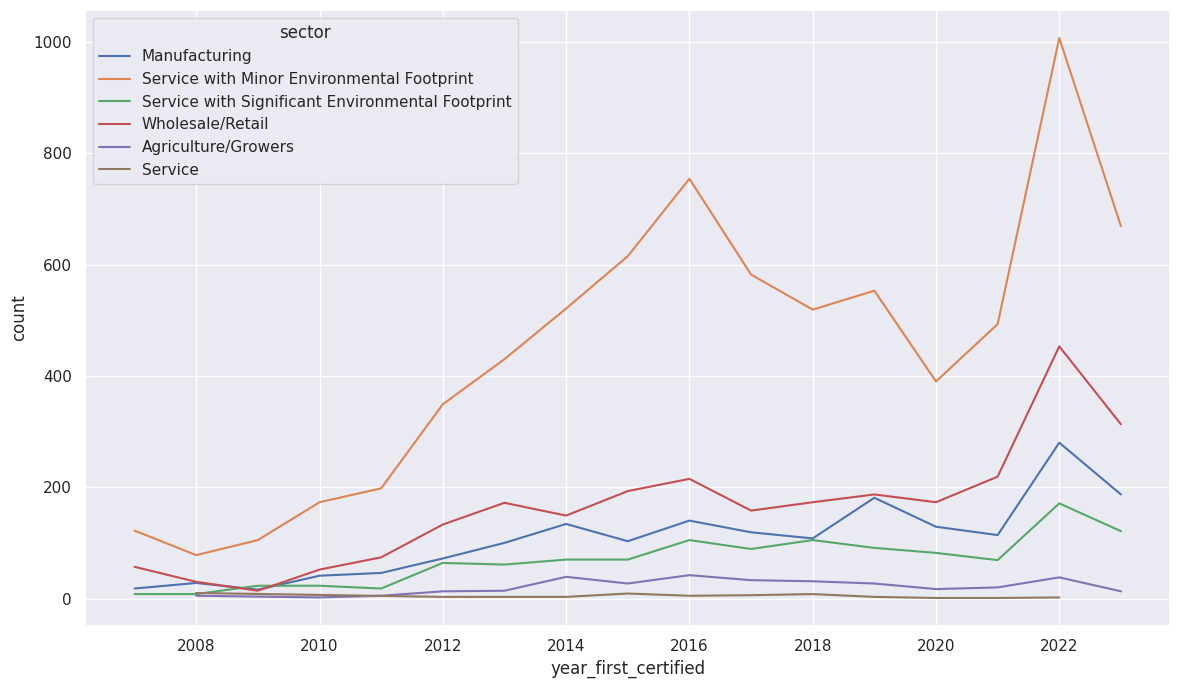

In [27]:
# Using seaborn to create a line plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))

# Plot the responses for different sectors and years
sns.lineplot(x="year_first_certified", y="count",
             hue="sector",
             data=certification_counts)

It can be seen services with minor environmental footprint has actually focused on societal and environmental wellbeing compared to other sectors

### 4.4.4 Visualization 03 - ceritified B Corp count

---



##### Data Preprocessing

In [28]:
cols = ['date_first_certified', 'continent_name','sector', 'size', 'country','current_status','company_id', 'country_iso_code','year_first_certified']
vis3 = bcorps_main_data[cols]

grouped_data_vis3 = vis3.groupby(['year_first_certified', 'current_status']).size().reset_index(name='row_count')
grouped_data_vis3

,year_first_certified,current_status,row_count
0,2007,certified,124
1,2007,de-certified,81
2,2008,certified,101
3,2008,de-certified,58
4,2009,certified,64
5,2009,de-certified,94
6,2010,certified,150
7,2010,de-certified,141
8,2011,certified,225
9,2011,de-certified,116


##### Display Data

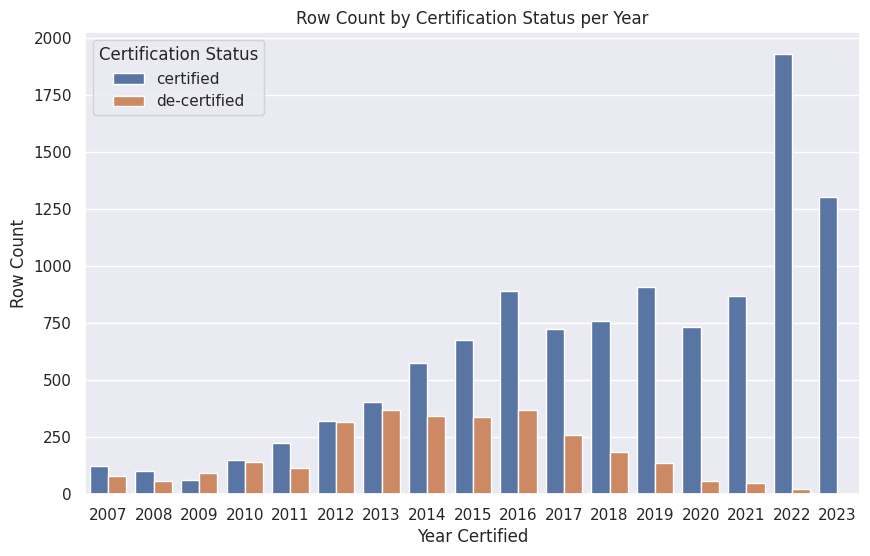

In [29]:
# Using seaborn to create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="year_first_certified", y="row_count", hue="current_status", data=grouped_data_vis3)

# Adding titles and labels
plt.title("Row Count by Certification Status per Year")
plt.xlabel("Year Certified")
plt.ylabel("Row Count")
plt.legend(title="Certification Status")

# Show the plot
plt.show()

Over the years the B Corp certification has seen a huge growth

### 4.4.5 Visualization 04 - Average B Corp Score by Region


In [30]:
# grouped the dataset by continent_name and year_certified and calculated the mean overall_score for each group
region_year_scores = bcorps_main_data.groupby(['continent_name', 'year_first_certified'])['overall_score'].mean().reset_index()

# Create the line plot using Plotly
fig = px.line(region_year_scores, x='year_first_certified', y='overall_score', color='continent_name',
              title='Average B Corp Scores by Region Over Years',
              labels={'overall_score': 'Average B Impact Score', 'year_certified': 'Year', 'continent_name': 'Region'})

# Improve layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Average B Impact Score',
                  legend_title='Region',
                  xaxis=dict(tickmode='linear'),
                  hovermode='x')

# Show the plot
fig.show()

### 4.4.6 Visualization 05 - Average B Corp Score by Sector


In [31]:
# grouped the dataset by sector and year_certified and calculated the mean overall_score for each group
sector_year_scores = bcorps_main_data.groupby(['sector', 'year_first_certified'])['overall_score'].mean().reset_index()

# Create the line plot using Plotly
fig = px.line(sector_year_scores, x='year_first_certified', y='overall_score', color='sector',
              title='Average B Corp Scores by Sector Over Years',
              labels={'overall_score': 'Average B Impact Score', 'year_certified': 'Year', 'sector': 'Sector'})

# Improve layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Average B Impact Score',
                  legend_title='Sector',
                  xaxis=dict(tickmode='linear'),
                  hovermode='x unified')  # 'x unified' hovermode for better cross-comparison

# Show the plot
fig.show()

### 4.4.7 Visualization 06 - Reigning B Corp Industries


In [ ]:
# Filter for active certifications
active_companies = bcorps_main_data[bcorps_main_data['current_status'] == 'certified']

# Removing the duplicate values of the company
active_companies = active_companies.sort_values('date_certified', ascending=False).drop_duplicates('company_id')

# Group by industry and count the number of companies. Limiting the results to largest 10
industry_counts = active_companies.groupby('industry_category').size().nlargest(10).reset_index(name='count')

# Visualization
fig = px.bar(industry_counts, x='industry_category', y='count', color='industry_category',
             title='Top 10 Industries with the Highest Number of B Corp Certified Companies',
             labels={'count': 'Number of Certified Companies', 'industry': 'Industry'},
             category_orders={'industry': industry_counts['industry_category'].tolist()})

# layout
fig.update_layout(
    xaxis_title='Industry',
    yaxis_title='Number of Certified Companies',
    showlegend=False
)

# Optional: Add a more distinct color palette if desired
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.show()

# 5.0 The Correlation


Installing libraries to perform enocding

In [32]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [33]:
# Importing the libraries
from category_encoders import TargetEncoder

# Selecting the Columns for Target Encoding
target_columns = ['country', 'industry_category', 'sector', 'size', 'current_status', 'continent_name', 'country_iso_code', 'company_id', 'date_first_certified', 'date_certified']
target = bcorps_main_data['overall_score']

# Initialize TargetEncoder
target_encoder = TargetEncoder()
target_encoded_data = target_encoder.fit_transform(bcorps_main_data[target_columns], target)
target_encoded_df = pd.DataFrame(target_encoded_data, columns=target_columns)

columns_to_delete_safe = [
    col for col in [
        'description', 'industry', 'products_and_services', 'state', 'city',
        'b_corp_profile', 'website'
    ] + [col for col in bcorps_main_data.columns if col.startswith('ia_')]
    if col in bcorps_main_data.columns
]

# Proceed to delete columns safely
bcorp_new = bcorps_main_data.drop(columns=columns_to_delete_safe, inplace=True)

bcorps_main_data_clean = bcorps_main_data.drop(columns=target_columns)

# Concatenate the remaining columns of the original dataframe with the target encoded columns
cleaned_dataset = pd.concat([bcorps_main_data_clean, target_encoded_df], axis=1)

cleaned_dataset

,index,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,...,country,industry_category,sector,size,current_status,continent_name,country_iso_code,company_id,date_first_certified,date_certified
0,0,2020,88.3,23.5,20.6,2.8,14.1,19.4,3.3,0.0,...,95.595066,94.515302,96.558931,95.544897,95.840404,94.620779,95.595066,94.619078,94.824617,94.532819
1,1,2017,87.1,21.2,26.6,2.8,12.9,22.7,0.9,0.0,...,95.595066,94.515302,96.558931,95.544897,95.840404,94.620779,95.595066,94.619078,94.824617,96.561418
2,2,2019,84.6,16.6,1.9,7.2,18.4,35.0,1.7,0.0,...,94.314458,95.636420,96.558931,96.048340,95.840404,93.959876,94.314458,94.310420,94.521780,94.421523
3,3,2019,91.8,16.3,26.0,6.8,12.9,25.9,0.9,0.4,...,94.314458,102.521767,96.558931,95.544897,95.840404,93.959876,94.314458,95.247201,95.429980,97.647400
4,4,2018,83.5,17.5,10.5,15.7,14.5,21.5,0.6,0.0,...,97.482966,92.848753,96.011885,95.544897,95.478912,97.525565,97.482966,94.167301,95.433918,94.326865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,13689,2016,80.1,16.9,19.3,5.8,11.8,25.5,0.0,0.0,...,97.482966,95.636420,96.558931,95.605453,95.840404,97.525565,97.482966,93.921246,95.347528,95.108464
13690,13690,2014,95.9,11.4,35.9,5.3,12.3,29.0,0.2,0.0,...,97.482966,95.636420,96.558931,95.605453,95.840404,97.525565,97.482966,93.921246,95.347528,95.780646
13691,13691,2011,83.1,8.6,28.8,6.0,7.5,32.2,0.0,0.0,...,97.482966,95.636420,96.558931,95.605453,95.840404,97.525565,97.482966,93.921246,95.347528,94.661633
13692,13692,2021,81.0,22.3,3.2,11.3,18.0,21.4,0.0,0.0,...,93.279770,94.141097,96.558931,95.605453,95.840404,93.959876,93.279770,93.842029,95.364597,95.126169


In [34]:
# Rechecking the column datatypes
cleaned_dataset.dtypes

index                                 int64
assessment_year                       int64
overall_score                       float64
impact_area_community               float64
impact_area_customers               float64
impact_area_environment             float64
impact_area_governance              float64
impact_area_workers                 float64
impact_area_community_na_score      float64
impact_area_customers_na_score      float64
impact_area_environment_na_score    float64
impact_area_governance_na_score     float64
impact_area_workers_na_score        float64
certification_cycle                 float64
year_first_certified                  int32
country                             float64
industry_category                   float64
sector                              float64
size                                float64
current_status                      float64
continent_name                      float64
country_iso_code                    float64
company_id                      

In [35]:
# Calculate the correlation matrix
impact_correlation_matrix = cleaned_dataset.corr()

import plotly.express as px

fig = px.imshow(impact_correlation_matrix, text_auto=".2f", color_continuous_scale='Viridis', aspect="auto")

# Update layout to make it more readable
fig.update_layout(
    title='Correlation Matrix',
    width = 1400,
    height = 1080)
fig.show()

According to the above correlation matrix it could be concluded that over_score is the dependant variable, since it has more positive relation with all the other variables.

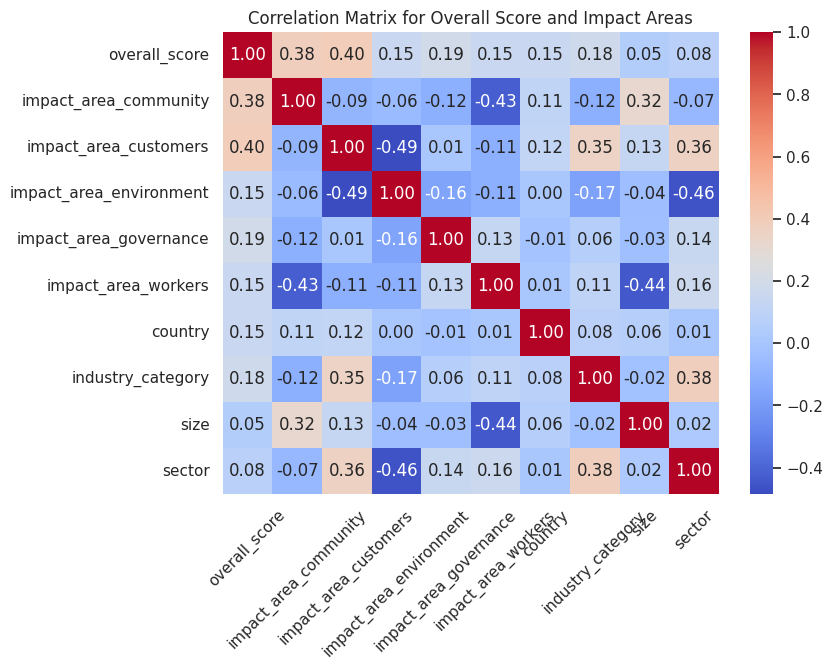

In [36]:
# Selecting specified columns for the overall and impact areas
impact_columns = [
    "overall_score",
    "impact_area_community",
    "impact_area_customers",
    "impact_area_environment",
    "impact_area_governance",
    "impact_area_workers",
    "country",
    "industry_category",
    "size",
    "sector"
]

# Creating a subset of the data with the specified columns
impact_data = cleaned_dataset[impact_columns]

# Calculate the correlation matrix for impact areas
impact_correlation_matrix = impact_data.corr()

# Generating the heatmap for impact areas
plt.figure(figsize=(8, 6))
sns.heatmap(impact_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Overall Score and Impact Areas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.gcf().set_size_inches(20, 16)
#plt.savefig('cor.png')
plt.show()

# 6.0 Computation-based data analysis

##### Data preparation

In [37]:
cols = ['date_first_certified', 'continent_name','sector', 'size', 'country', 'company_id', 'country_iso_code', 'overall_score']

forecasting_dataset = bcorps_main_data[cols]

#date conversion
forecasting_dataset['year_first_certified'] = pd.to_datetime(forecasting_dataset['date_first_certified']).dt.year
# Applying the size mapping to the 'size' column
forecasting_dataset['size'] = forecasting_dataset['size'].apply(lambda x: max(extract_numbers(x)))


forecasting_dataset = forecasting_dataset.groupby(['continent_name', 'year_first_certified', 'sector', 'country_iso_code']).agg(
    company_count=('company_id', 'nunique'),
    size_summary=('size', 'sum'),
    avg_score=('overall_score', 'mean')
).reset_index()

#Creating the subset
forecasting_dataset


<ipython-input-37-a20e1c2be838>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-a20e1c2be838>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,continent_name,year_first_certified,sector,country_iso_code,company_count,size_summary,avg_score
0,Africa,2011,Service with Minor Environmental Footprint,KEN,2,547,132.100000
1,Africa,2012,Service with Minor Environmental Footprint,KEN,1,18,111.350000
2,Africa,2012,Service with Significant Environmental Footprint,MUS,1,1249,111.050000
3,Africa,2012,Wholesale/Retail,KEN,2,2315,118.666667
4,Africa,2013,Service with Significant Environmental Footprint,TZA,1,250,106.300000
...,...,...,...,...,...,...,...
1210,South America,2023,Service with Significant Environmental Footprint,COL,3,347,111.966667
1211,South America,2023,Wholesale/Retail,ARG,3,347,92.933333
1212,South America,2023,Wholesale/Retail,BRA,6,405,90.416667
1213,South America,2023,Wholesale/Retail,CHL,2,58,83.650000


In [38]:
# importing libraries to calculate accuracy
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 6.1 Forecasting Future Trends - Average Overall Score for Sectors

In [39]:
#Creating an empty table for sector wise data
import re

# Assuming forecasting_dataset['sector'].unique() returns a list of sectors
sectors = forecasting_dataset['sector'].unique().tolist()

# Convert to lowercase, remove spaces, and replace special characters
columns = ['year'] + [re.sub(r'[^a-zA-Z0-9]+', '_', sector.lower().replace(' ', '_')) for sector in sectors]
region_dataset = pd.DataFrame(columns=columns)

def calculate_avg(df, year, column_name):
    row_data = {'year': year}
    for sectors in columns[1:]:
        filtered_df = df[(df['year_first_certified'] == year) & (df['sector'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', '_', x.lower().replace(' ', '_'))) == sectors)]
        mean_value = filtered_df[column_name].mean()
        row_data[sectors] = mean_value
    return row_data

avg_data = []

for year in range(2007, 2024):
    row_data = calculate_avg(forecasting_dataset, year, 'avg_score')
    avg_data.append(row_data)

region_dataset = pd.concat([region_dataset, pd.DataFrame(avg_data)], ignore_index=True)
region_dataset['year'] = region_dataset['year'].astype('int64')
region_dataset.fillna(0)

#replacing indexes by 'Year' column in datetime64 format
region_dataset['year'] = pd.to_datetime(region_dataset['year'], format='%Y')
region_dataset.set_index('year', inplace=True)

#defining forecast DataFrame
region_dataset = region_dataset.resample('Y').mean()

region_dataset.fillna(region_dataset.mean(), inplace=True)
region_dataset

,service_with_minor_environmental_footprint,service_with_significant_environmental_footprint,wholesale_retail,manufacturing,agriculture_growers,service
year,,,,,,
2007-12-31,105.459836,105.337500,103.152632,112.272222,102.205319,95.614015
2008-12-31,100.539744,149.312500,102.346667,104.807143,125.000000,141.300000
2009-12-31,102.272500,105.395652,127.842857,114.662500,102.205319,95.614015
2010-12-31,106.817764,93.086957,102.371250,107.823950,99.100000,95.614015
2011-12-31,118.809766,106.368750,103.266216,99.631783,134.760000,95.614015
2012-12-31,107.155588,118.124230,93.969319,96.628355,113.331111,84.166667
2013-12-31,101.124690,98.202604,91.665521,91.076345,106.097917,95.614015
2014-12-31,102.488263,99.832166,107.604973,95.553642,108.598148,95.700000
2015-12-31,98.159278,95.773094,100.884350,100.989483,103.950000,95.850000


Install packages for forecasting

In [40]:
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 12.7 MB/s eta 0:00:00
     ━━━━

In [41]:
#importing some necessary packages for forecasting
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.arima import AutoARIMA

import plotly.express as px
import plotly.graph_objects as go

#Forecasting and visualization
def forecast_values(dataset, horizon, forecaster, y_title, confidence=0.90, frequency="Y"):

     # Adjusting frequency and interpolate missing values
    forecast_data = dataset.resample(rule=frequency).sum()
    forecast_data = forecast_data.interpolate(method="time")

    # Create a figure
    fig = go.Figure()

    # Add traces for each series
    for col in dataset.columns:
        fig.add_trace(go.Scatter(x=dataset.index, y=dataset[col], mode='lines', name=col))

    error_array = []

    for col in dataset.columns:
        df = forecast_data[col].dropna()
        forecaster.fit(df)
        last_date = df.index.max()
        fore_hori = ForecastingHorizon(pd.date_range(str(last_date), periods=horizon, freq=frequency), is_relative=False)
        y_pred = forecaster.predict(fore_hori)
        ci = forecaster.predict_interval(fore_hori, coverage=confidence).astype("float")
        y_true = df.tail(horizon)

        fig.add_trace(go.Scatter(
            x=ci.index,
            y=y_true,
            #fill='toself',
            name=col + " # " + 'Predicted',
        ))

        _sub = {}
        _sub['Column Name'] = col
        _sub['Mean Absolute Error (MAE)'] = mean_absolute_error(y_true, y_pred)
        _sub['Mean Squared Error (MSE)'] = mean_squared_error(y_true, y_pred)
        _sub['Root Mean Squared Error (RMSE)'] = np.sqrt(mean_squared_error(y_true, y_pred))
        error_array.append(_sub)


    # Update layout
    fig.update_layout(title="Forecast Trends Over Years | Overall Score",
                      xaxis_title="Year",
                      yaxis_title=y_title,
                      legend_title="Categories")

    # Show the figure
    fig.update_traces(mode='lines')
    fig.show()

    return error_array


#Foecasting by AutoARIMA
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
err = forecast_values(dataset=region_dataset, horizon=5, forecaster=forecaster, y_title= "Overall Score")

In [42]:
err_df = pd.DataFrame(err)
err_df

,Column Name,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,service_with_minor_environmental_footprint,0.840240,1.084265,1.041280
1,service_with_significant_environmental_footprint,3.460244,16.574060,4.071125
2,wholesale_retail,2.423644,8.156027,2.855876
3,manufacturing,1.428987,2.768019,1.663736
4,agriculture_growers,2.867964,9.646737,3.105920
5,service,6.155606,62.103953,7.880606


## 6.2 Forecasting Future Trends - BCorp company count by regions

In [43]:
#Creating an empty table for region wise data
import re

# Assuming forecasting_dataset['sector'].unique() returns a list of sectors
continent_names = forecasting_dataset['continent_name'].unique().tolist()

# Convert to lowercase, remove spaces, and replace special characters
columns = ['year'] + [re.sub(r'[^a-zA-Z0-9]+', '_', continent_name.lower().replace(' ', '_')) for continent_name in continent_names]
region_dataset_2 = pd.DataFrame(columns=columns)

def calculate_avg(df, year, column_name):
    row_data = {'year': year}
    for continent_names in columns[1:]:
        filtered_df = df[(df['year_first_certified'] == year) & (df['continent_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', '_', x.lower().replace(' ', '_'))) == continent_names)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent_names] = mean_value
    return row_data

avg_data = []

for year in range(2007, 2024):
    row_data = calculate_avg(forecasting_dataset, year, 'company_count')
    avg_data.append(row_data)

region_dataset_2 = pd.concat([region_dataset_2, pd.DataFrame(avg_data)], ignore_index=True)
region_dataset_2['year'] = region_dataset_2['year'].astype('int64')
region_dataset_2.fillna(0)

#replacing indexes by 'Year' column in datetime64 format
region_dataset_2['year'] = pd.to_datetime(region_dataset_2['year'], format='%Y')
region_dataset_2.set_index('year', inplace=True)

#defining forecast DataFrame
region_dataset_2 = region_dataset_2.resample('Y').mean()

region_dataset_2.fillna(region_dataset_2.mean(), inplace=True)
region_dataset_2

,africa,asia,europe,north_america,oceania,south_america
year,,,,,,
2007-12-31,1.253913,1.417638,5.735515,10.750000,8.188790,3.763141
2008-12-31,1.253913,1.417638,5.735515,6.333333,8.188790,3.763141
2009-12-31,1.253913,1.417638,5.735515,7.166667,8.188790,3.763141
2010-12-31,1.253913,1.417638,5.735515,10.375000,8.188790,3.763141
2011-12-31,2.000000,1.000000,5.735515,12.375000,8.188790,3.763141
2012-12-31,1.333333,1.000000,1.000000,13.615385,1.333333,2.000000
2013-12-31,1.000000,1.000000,1.600000,17.307692,3.000000,3.285714
2014-12-31,1.000000,1.500000,1.545455,19.909091,9.000000,4.222222
2015-12-31,1.000000,1.375000,4.869565,14.333333,6.714286,2.545455


In [44]:
#Foecasting by AutoARIMA
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
err = forecast_values(dataset=region_dataset_2, horizon=5, forecaster=forecaster, y_title= "Company Count")

In [45]:
err_df = pd.DataFrame(err)
err_df

,Column Name,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,africa,0.160406,0.031762,0.178218
1,asia,0.279874,0.092828,0.304677
2,europe,5.098338,35.832831,5.986053
3,north_america,4.149000,23.707550,4.869040
4,oceania,3.730939,22.169391,4.708438
5,south_america,0.684914,1.185795,1.088942


## 6.3 Predicting Overall Score

### 6.3.1 Feature selection and Normalization.

Both ANN and SVM can increase the accuracy from normalization, so we can apply this step.

In [46]:
# Feature selection
features_df = bcorps_main_data[[
    'impact_area_community',
    'impact_area_customers',
    'impact_area_environment',
    'impact_area_governance',
    'impact_area_workers'
]]

selected_encoded_features = target_encoded_df[['country', 'industry_category','sector']]
combined_features_df = pd.concat([features_df, selected_encoded_features], axis=1)

# Dependent Variable
features = [
    "impact_area_community",
    "impact_area_customers",
    "impact_area_environment",
    "impact_area_governance",
    "impact_area_workers",
    "country",
    "industry_category",
    "sector"
]

# Predicting Variable
target = "overall_score"

In [47]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(combined_features_df[features])
y = bcorps_main_data[target]

In [48]:
#split data to train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9174, 8) (9174,)
Test set: (4520, 8) (4520,)


### 6.3.2 Artificial neural networks (ANN model)

In [49]:
from sklearn.neural_network import MLPRegressor

ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPRegressor(max_iter=500, random_state=42)

In [50]:
y_pred_ann=ann_model.predict(X_test)
y_pred_ann

array([ 83.28668248,  93.13055125,  95.54770716, ...,  93.97053687,
        88.12519693, 107.71512678])

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("Mean absolute error: %.2f" % mae_ann)
print("Mean squared error: %.2f" % mse_ann)
print("Root Mean squared error: %.2f" % rmse_ann)
print("R2-score: %.2f" % r2_ann)

Mean absolute error: 2.60
Mean squared error: 11.93
Root Mean squared error: 3.45
R2-score: 0.95


In [53]:
# Calculating residuals
residuals = y_test - y_pred_ann

# Creating a DataFrame for plotting
df = pd.DataFrame({
    'Predicted Values': y_pred_ann,
    'Residuals': residuals
})

# Creating the residual plot using Plotly Express
fig = px.scatter(df, x='Predicted Values', y='Residuals', title='Residual Plot for ANN Model',
                 labels={'Residuals': 'Residuals', 'Predicted Values': 'Predicted Values'},
                 trendline='ols')

# Layout
fig.update_layout(xaxis_title='Predicted Values', yaxis_title='Residuals')

# Show the plot
fig.show()

### 6.3.3 Support vector machine (SVM Model)

In [54]:
from sklearn.svm import SVR
svm_model = SVR()

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([ 81.65734732,  91.81021018,  95.08312297, ...,  94.17217092,
        86.13629282, 105.52834692])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Mean absolute error: %.2f" % mae_svm)
print("Mean squared error: %.2f" % mse_svm)
print("Root Mean squared error: %.2f" % rmse_svm)
print("R2-score: %.2f" % r2_svm)

Mean absolute error: 3.20
Mean squared error: 24.86
Root Mean squared error: 4.99
R2-score: 0.90


In [56]:
# Calculating residuals
residuals_svm = y_test - y_pred_svm

# Creating a DataFrame for plotting
df_svm = pd.DataFrame({
    'Predicted Values': y_pred_svm,
    'Residuals': residuals_svm
})

# Creating the residual plot using Plotly Express
fig_svm = px.scatter(df_svm, x='Predicted Values', y='Residuals', title='Residual Plot for SVM Model',
                     labels={'Residuals': 'Residuals', 'Predicted Values': 'Predicted Values'},
                     trendline='ols')

# Layout
fig_svm.update_layout(xaxis_title='Predicted Values', yaxis_title='Residuals')

# Show the plot
fig_svm.show()

### 6.3.4 RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse_rfr = mean_squared_error(y_test, predictions)
mae_rfr = mean_absolute_error(y_test, predictions)  # Calculate MAE
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, predictions)

print("Mean absolute error: %.2f" % mae_rfr)
print("Mean squared error: %.2f" % mse_rfr)
print("Root Mean squared error: %.2f" % rmse_rfr)
print("R2-score: %.2f" % r2_rfr)

Mean absolute error: 3.35
Mean squared error: 21.79
Root Mean squared error: 4.67
R2-score: 0.91


In [58]:
# Calculating residuals
residuals_rfr = y_test - predictions

# Creating a DataFrame for plotting
df_rfr = pd.DataFrame({
    'Predicted Values': predictions,
    'Residuals': residuals_rfr
})

# Creating the residual plot using Plotly Express
fig_rfr = px.scatter(df_rfr, x='Predicted Values', y='Residuals', title='Residual Plot for RandomForest Regressor',
                     labels={'Residuals': 'Residuals', 'Predicted Values': 'Predicted Values'},
                     trendline='ols')

# Layout
fig_rfr.update_layout(xaxis_title='Predicted Values', yaxis_title='Residuals')

# Show the plot
fig_rfr.show()

### 6.3.5 Model Comparison

In [59]:
results = pd.DataFrame({
    'Model': ['ANN','SVM','Random Forest'],
    'MSE': [mse_ann, mse_svm, mse_rfr],
    'R-squared': [r2_ann, r2_svm, r2_rfr]
})
results

,Model,MSE,R-squared
0,ANN,11.930719,0.950138
1,SVM,24.856152,0.896119
2,Random Forest,21.789868,0.908934


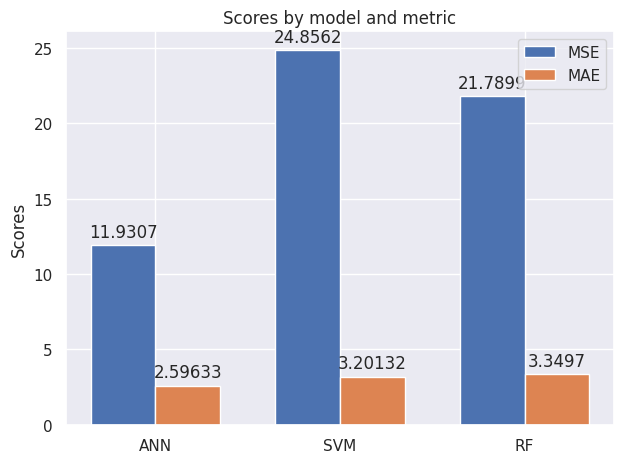

In [60]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['ANN', 'SVM', 'RF']
mse_scores = [mse_ann, mse_svm, mse_rfr]
mae_scores = [mae_ann, mae_svm, mae_rfr]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_scores, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_scores, width, label='MAE')

# Labeling the graph
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
